In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# load libraries and set plot parameters
import numpy as np
import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \uXXXX escape (<ipython-input-2-31a52d403844>, line 24)

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
rev_new = pd.read_csv("Reviews_new.csv", index_col=0)

rev_new_T = pd.read_csv('Review_Title.csv', index_col=0)

### Correlations:
##### Correlation between age and positive feedback count.
I start to plot the correlation between age and positive feedback count received: there is no correlation!

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


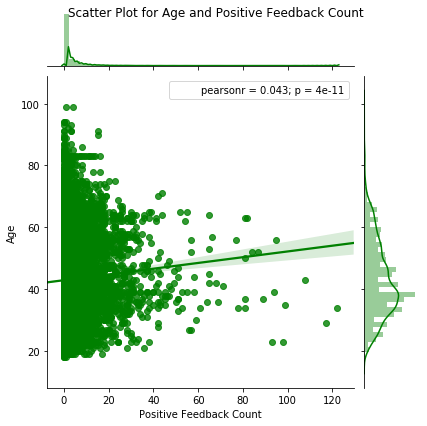

In [4]:
sns.jointplot(x='Positive Feedback Count', y='Age', data= rev, kind='reg', color='g')
plt.suptitle('Scatter Plot for Age and Positive Feedback Count')
plt.show()

### We calculate the count and mean group by Clothing ID of Rating, Recommended IND, Age and Positive Feedback Count. 

In [4]:
stat = (rev.groupby('Clothing ID')[["Rating","Recommended IND", "Age", "Positive Feedback Count"]].aggregate(['count','mean']))
stat.columns = ["Rating_Count","Rating_Mean","Recommended_Count", "Recommended_Mean","Age_Count","Age_Mean", "Positive_Feedback_count", "Positive_Feedback_mean"]

#### Correlation between Recommended Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


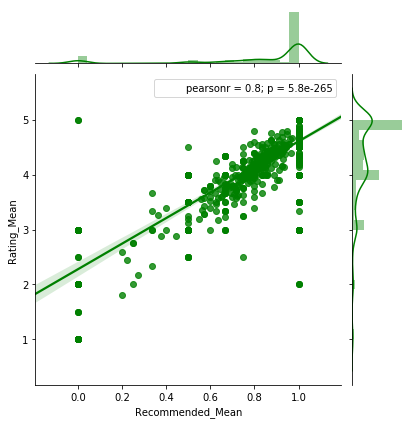

In [6]:
sns.jointplot(x="Recommended_Mean", y="Rating_Mean", data= stat, kind="reg", color="g")

There is a strong positive correlation of 0.8 between rating and recommended IND mean. It means that when the products are recommended probably the rating is high and viceversa.

#### Correlation between Recommended Mean and Positive Feedback Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.18400664349247886
p value = 1.2064578571161925e-10


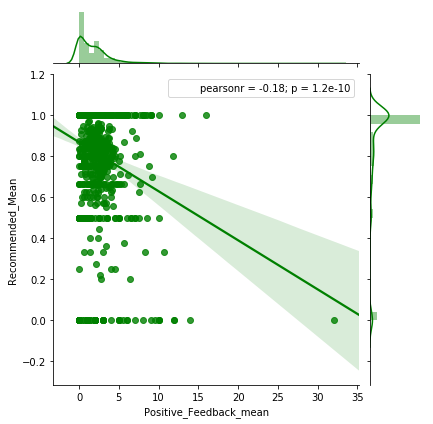

In [7]:
sns.jointplot(x="Positive_Feedback_mean", y="Recommended_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Recommended_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

Here, instead, it seems that there is a very slightly negative (-0.18) correlation between Positive Feedback mean and recommended mean. It means that there are more positive feedback when the products are not recommended.

#### Correlation between Positive Feedback Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.1867906390887257
p value = 6.248514221597484e-11


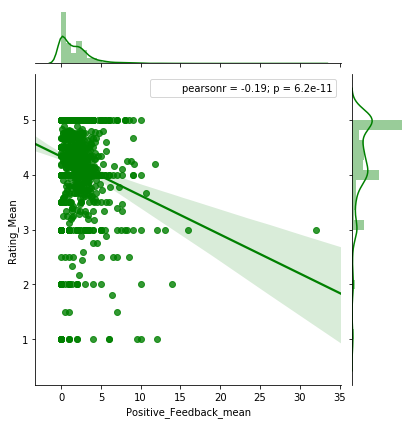

In [8]:
sns.jointplot(x="Positive_Feedback_mean", y="Rating_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Rating_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

As for recommended, also between rating and positive feedback mean the correlation coefficient is ~ -0.19.

#### Correlation Matrix.

This matrix investigates if there is trend between average rating and number of reviews by product.

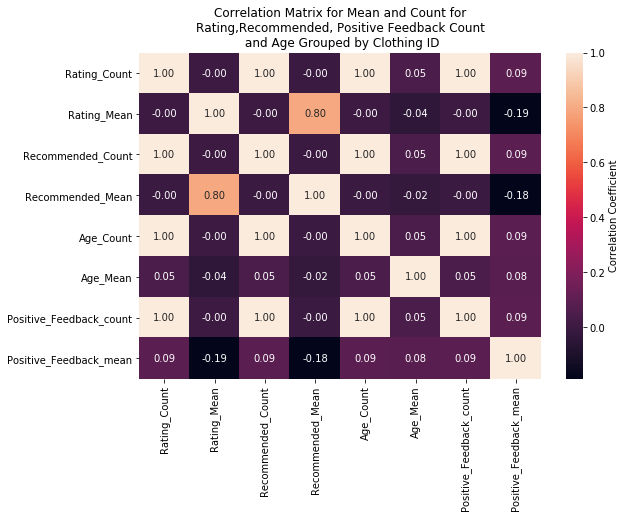

In [5]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(stat.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, Positive Feedback Count\n and Age Grouped by Clothing ID")
#plt.savefig('Correlation_Matrix.jpg', bbox_inches='tight')
plt.show()

From the heatmap, we can understand that there isn't correlation between count and average value. But, we can see also that there is a strong positive correlation of .80 between rating and recommended IND mean as the plot above shown.

In [10]:
stat.head()

,Rating_Count,Rating_Mean,Recommended_Count,Recommended_Mean,Age_Count,Age_Mean,Positive_Feedback_count,Positive_Feedback_mean
Clothing ID,,,,,,,,
0,1,5.0,1,1.000000,1,26.000000,1,0.000000
1,3,4.0,3,0.666667,3,36.666667,3,0.333333
2,1,4.0,1,1.000000,1,28.000000,1,0.000000
3,1,5.0,1,1.000000,1,36.000000,1,0.000000
4,1,5.0,1,1.000000,1,28.000000,1,0.000000


### Statistics with rev_new file

Now we use the dataframe created after the work done on 'Text Review'. 

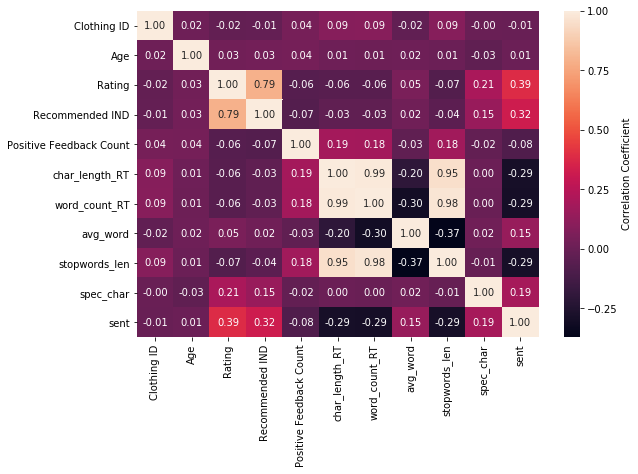

In [8]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(rev_new.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
plt.savefig('Correlation_Matrix_rev_new.jpg', bbox_inches='tight')
plt.show()

From this correlation matrix, we can note that the polarity score ('sent') has a slightly correlation with Rating (0.39) and also with Recommended IND (0.32). It means that when the rating are high and the products recommended, the reviews have more positive polarity score.  
Also, it seems to be a negative correlation (-0.29) between polarity score and word count.  

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


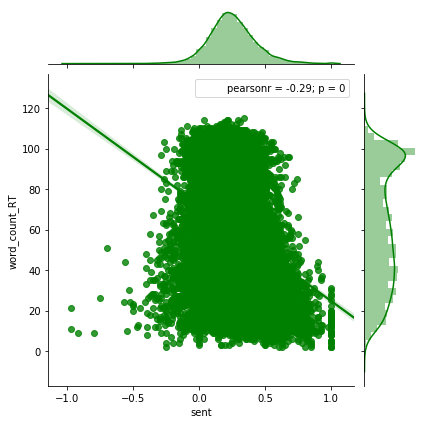

In [12]:
sns.jointplot(x="sent", y="word_count_RT", data= rev_new, kind="reg", color="g")

The correlation is slightly negative, as said before, between word count and polarity score. It means that the people that write negative reviews write more than the other one.

### Statistics for Title

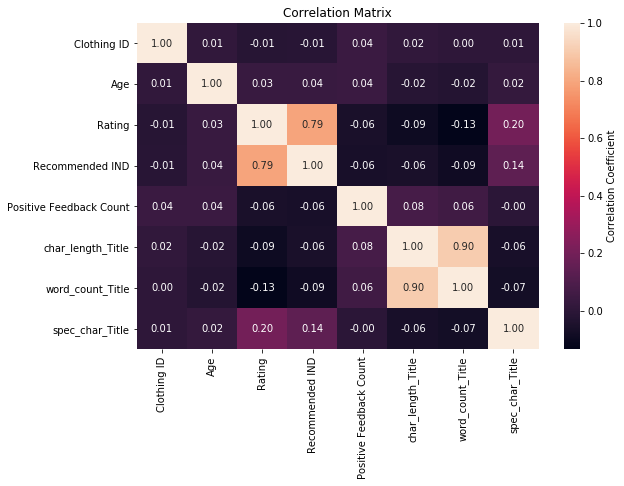

In [7]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(rev_new_T.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix")
plt.savefig('Correlation_Matrix_Title.jpg', bbox_inches='tight')
plt.show()

Here, we consider the dataframe 'rev_new_T' where we processed the 'Title' feature.
We can notice that there is only a slightly positive correlation between the Rating and the special character '!'. More exclamation points mean higher rating.